[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pachterlab/OP_2025/blob/main/analysis_scripts/Initial_RNA_Analysis.ipynb)

In [1]:
# import packages

import os, sys
sys.path.append('../')
from pathlib import Path

# numbers
import numpy as np
import pandas as pd

# sc
import scanpy as sc
import anndata

# plots
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
os.chdir('../')

# Metadata Loading

In [3]:
original_outlier_viallabels = ['90571016002', '90266016903', '90218016903', '90266016902', '90416016902', '90245016105', '90232016105', '90439016105', '90449016105', '90292016105', '90229016102', '90567015802', '90267015802', '90559015805', '90406015204', '90423015204', '90217015204', '90406015203', '90252015402', '90406015402', '90217015402', '90292015904', '90450015903', '90444015902', '90560016806', '90567016805', '90267016805', '90444016805', '90560016806', '90560016806', '90218016803', '90251016604', '90252015507', '90245015507', '90223015507', '90252015507', '90245015507', '90223015507', '90252015603', '90217015603', '90441016702', '90289016302', '90585016502', '90585016503', '90585016504', '90581016502', '90581016503', '90581016504', '90560016502', '90560016503', '90560016504', '90571016502', '90571016503', '90571016504', '90567016502', '90567016503', '90567016504', '90576016502', '90576016503', '90576016504', '90564016502', '90564016503', '90564016504', '90578016502', '90578016503', '90578016504', '90587016502', '90587016503', '90587016504', '90559016502', '90559016503', '90559016504', '90567017011', '90267017011', '90585017004', '90410017005', '90423017005']

color_opts =  np.array([
    "#D55E00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#E69F00", "#CC79A7", "#666666", "#AD7700", "#1C91D4", "#007756", "#D5C711", "#005685",
    "#A04700", "#B14380", "#4D4D4D", "#FFBE2D", "#80C7EF", "#00F6B3", "#F4EB71", "#06A5FF", "#FF8320", "#D99BBD", "#8C8C8C", "#FFCB57", "#9AD2F2",
    "#2CFFC6", "#F6EF8E", "#38B7FF", "#FF9B4D", "#E0AFCA", "#A3A3A3", "#8A5F00", "#1674A9", "#005F45", "#AA9F0D", "#00446B", "#803800", "#8D3666",
    "#3D3D3D"
])
tissues = ['ADRNL','BAT','BLOOD','COLON','CORTEX','HEART','HIPPOC','HYPOTH',
 'KIDNEY','LIVER', 'LUNG','OVARY','SKM-GN','SKM-VL','SMLINT','SPLEEN','TESTES','VENACV','WAT']
color_dict = {}

for x in range(len(tissues)):
    color_dict[tissues[x]] = color_opts[x]

color_dict

{'ADRNL': '#D55E00',
 'BAT': '#56B4E9',
 'BLOOD': '#009E73',
 'COLON': '#F0E442',
 'CORTEX': '#0072B2',
 'HEART': '#E69F00',
 'HIPPOC': '#CC79A7',
 'HYPOTH': '#666666',
 'KIDNEY': '#AD7700',
 'LIVER': '#1C91D4',
 'LUNG': '#007756',
 'OVARY': '#D5C711',
 'SKM-GN': '#005685',
 'SKM-VL': '#A04700',
 'SMLINT': '#B14380',
 'SPLEEN': '#4D4D4D',
 'TESTES': '#FFBE2D',
 'VENACV': '#80C7EF',
 'WAT': '#00F6B3'}

In [ ]:
phenotype = pd.read_csv('metadata_csvs/phenotype.csv')
slim_pheno = phenotype.loc[:,[('calculated' in x) or (x in ['viallabel', 'pid', 'group', 'sex', 'tissue']) for x in phenotype.columns.values]]
time_course = {'control':0, '1w': 1, '2w': 2, '4w': 4, '8w': 8}
slim_pheno['time'] =  [time_course[x] for x in slim_pheno['group']]

# rename with nid
slim_pheno['sex'] = ['M' if x=='male' else 'F' for x in slim_pheno.sex.values]
slim_pheno['rank'] = slim_pheno.groupby(['sex', 'time'])["pid"].rank(method="dense").values.astype('int')
slim_pheno['rank'] = [chr(ord('@')+x) for x in slim_pheno['rank'].values]
slim_pheno['nid'] = slim_pheno['sex'] + slim_pheno['time'].astype('str') + slim_pheno['rank']

meta = pd.read_csv('metadata_csvs/rat_metadata_filtered.csv')
combined_meta = pd.merge(slim_pheno, meta, on = 'viallabel', how = 'outer', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')

combined_meta.to_csv('metadata_csvs/rat_nid_metadata.csv',index = False)
combined_meta

/tmp/ipykernel_2033688/1930340408.py:1: DtypeWarning: Columns (36,39,40,41,43,49,65,80,81,103,111,119,127,136,146,155,164,173,182,183,185,192,193,195,200,201,203,208,209,211,216,217,219,225,226,228,235,236,238,243,244,246,251,252,254,259,260,262,268,269,271,278,279,281,286,287,289,294,295,297,302,303,305,311,312,314,321,322,324,329,330,332,337,338,340,345,346,348,354,355,357,364,365,367,372,373,375,380,381,383,388,389,391,397,398,400,402,403,405,410,411,413,418,419,421,427,428,430,436,454,455,458,459,460,462,464,470,472,491) have mixed types. Specify dtype option on import or set low_memory=False.
  phenotype = pd.read_csv('phenotype.csv')
/tmp/ipykernel_2033688/1930340408.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_pheno['time'] =  

,pid,viallabel,calculated.variables.pct_body_fat_change,calculated.variables.pct_body_lean_change,calculated.variables.pct_body_fluid_change,calculated.variables.lactate_change_dueto_train,calculated.variables.vo2_max_change,calculated.variables.coll_time_train,calculated.variables.deathtime_after_train,calculated.variables.frozetime_after_train,...,sex,tissue,time,rank,nid,barcode,path,nac_path,mat_path,amb_path
0,10023259,90217013001,1.8,6.9,1.6,7.7,-1.0,168866,169279,176100,...,M,BLOOD,0,A,M0A,SRR25251722,/tolva/rat_attack/rat/count_matrices_SRR252517...,/tolva/rat_attack/rat/count_matrices_SRR252517...,/tolva/rat_attack/rat/count_matrices_SRR252517...,/tolva/rat_attack/rat/count_matrices_SRR252517...
1,10023259,90217013104,1.8,6.9,1.6,7.7,-1.0,168866,169279,171453,...,M,PLASMA,0,A,M0A,NaN,NaN,NaN,NaN,NaN
2,10023259,90217013105,1.8,6.9,1.6,7.7,-1.0,168866,169279,171453,...,M,PLASMA,0,A,M0A,NaN,NaN,NaN,NaN,NaN
3,10023259,90217013106,1.8,6.9,1.6,7.7,-1.0,168866,169279,171453,...,M,PLASMA,0,A,M0A,NaN,NaN,NaN,NaN,NaN
4,10023259,90217013107,1.8,6.9,1.6,7.7,-1.0,168866,169279,171453,...,M,PLASMA,0,A,M0A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,10971645,90587017012,NaN,NaN,NaN,NaN,NaN,180724,180787,180734,...,F,WAT-SC,2,N,F2N,NaN,NaN,NaN,NaN,NaN
6152,10971645,90587017013,NaN,NaN,NaN,NaN,NaN,180724,180787,180734,...,F,WAT-SC,2,N,F2N,NaN,NaN,NaN,NaN,NaN
6153,10971645,90587017014,NaN,NaN,NaN,NaN,NaN,180724,180787,180734,...,F,WAT-SC,2,N,F2N,NaN,NaN,NaN,NaN,NaN
6154,10971645,90587017702,NaN,NaN,NaN,NaN,NaN,133620,180787,133621,...,F,NaN,2,N,F2N,NaN,NaN,NaN,NaN,NaN


# Dataset Import

In [ ]:
adata = anndata.read_h5ad("omics_adata/rat_genes.h5ad")
adata.obs.tissue = adata.obs.tissue.str.upper()
adata.obs = adata.obs.drop('pid', axis = 1)
adata

AnnData object with n_obs × n_vars = 879 × 24770
    obs: 'barcode', 'path', 'nac_path', 'mat_path', 'amb_path', 'time', 'sex', 'tissue', 'viallabel', 'calculated.variables.pct_body_fat_change', 'calculated.variables.pct_body_lean_change', 'calculated.variables.pct_body_fluid_change', 'calculated.variables.lactate_change_dueto_train', 'calculated.variables.vo2_max_change', 'calculated.variables.coll_time_train', 'calculated.variables.deathtime_after_train', 'calculated.variables.frozetime_after_train'
    var: 'gene_id', 'has_U_tr', 'eff_len', 'mt', 'ensembl_transcript_id', 'description'
    uns: 'X_name'
    layers: 'ambiguous', 'spliced', 'unspliced'

## Anotate with metadata

In [6]:
adata.obs = pd.merge(adata.obs.reset_index(), combined_meta, on='barcode', how='left', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)').set_index('index')
adata = adata[adata.obs['tissue'].notna()]

adata

View of AnnData object with n_obs × n_vars = 879 × 24770
    obs: 'barcode', 'path', 'nac_path', 'mat_path', 'amb_path', 'time', 'sex', 'tissue', 'viallabel', 'calculated.variables.pct_body_fat_change', 'calculated.variables.pct_body_lean_change', 'calculated.variables.pct_body_fluid_change', 'calculated.variables.lactate_change_dueto_train', 'calculated.variables.vo2_max_change', 'calculated.variables.coll_time_train', 'calculated.variables.deathtime_after_train', 'calculated.variables.frozetime_after_train', 'pid', 'group', 'rank', 'nid'
    var: 'gene_id', 'has_U_tr', 'eff_len', 'mt', 'ensembl_transcript_id', 'description'
    uns: 'X_name'
    layers: 'ambiguous', 'spliced', 'unspliced'

In [ ]:
gene_meta = pd.read_csv('metadata_csvs/t2go.csv')
adata.var = pd.merge(adata.var.reset_index(), gene_meta, left_on= 'gene_id', right_on='ensembl_transcript_id', how='left', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)').set_index('index')
adata.var = adata.var.drop(['X4'], axis=1)
adata

AnnData object with n_obs × n_vars = 879 × 24770
    obs: 'barcode', 'path', 'nac_path', 'mat_path', 'amb_path', 'time', 'sex', 'tissue', 'viallabel', 'calculated.variables.pct_body_fat_change', 'calculated.variables.pct_body_lean_change', 'calculated.variables.pct_body_fluid_change', 'calculated.variables.lactate_change_dueto_train', 'calculated.variables.vo2_max_change', 'calculated.variables.coll_time_train', 'calculated.variables.deathtime_after_train', 'calculated.variables.frozetime_after_train', 'pid', 'group', 'rank', 'nid'
    var: 'gene_id', 'has_U_tr', 'eff_len', 'mt', 'ensembl_transcript_id', 'description', 'ensembl_gene_id', 'X3', 'X5', 'X6', 'X7', 'X8'
    uns: 'X_name'
    layers: 'ambiguous', 'spliced', 'unspliced'

# Filtering by Number of UMIs

In [8]:
# plot rank vs number of UMIs for all cells
num_umi = np.array(adata.X.sum(axis=1).flatten())

# Plotting

# barcodes by # UMIs
fs = 15

knee_frame = pd.DataFrame({
    'num_umi': num_umi,
    'tissue': adata.obs.tissue,
    'time': adata.obs.time,
    'nid': adata.obs.nid,
    'barcode': adata.obs.barcode,
    'viallabel':adata.obs.viallabel.astype('int').astype('str')
})
knee_frame = knee_frame.sort_values('num_umi', ascending=True)
knee_frame['barcode_rank'] = range(len(num_umi))

outlier_knee = knee_frame
outlier_knee['outlier'] = outlier_knee.groupby('tissue')['num_umi'].transform(lambda x: np.abs(x-np.mean(x)) > 3*np.std(x))

/tmp/ipykernel_2033688/38699198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(knee_frame,


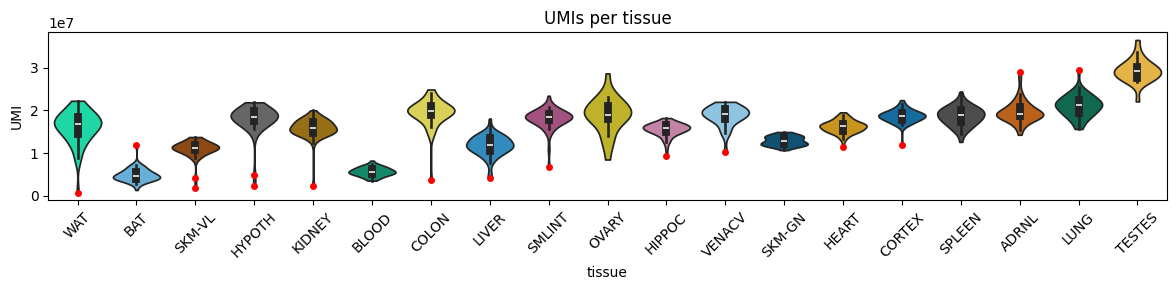

In [9]:
fig = plt.gcf()
fig.set_size_inches(12, 3)
sns.violinplot(knee_frame,
               x='tissue',
               y='num_umi',
            palette = color_dict,
              cut = 0)

sns.swarmplot(x ='tissue', y ='num_umi', data = outlier_knee[outlier_knee.outlier]
              ,color= "red")
plt.xticks(rotation=45)
plt.ylabel('UMI')
plt.title("UMIs per tissue")
plt.tight_layout()
plt.savefig(f'figures_final/fig_1b.png')

## View Which Outliers are New

In [10]:
outlier_knee['original_out'] = [x in original_outlier_viallabels for x in outlier_knee.viallabel.values]
outlier_knee[outlier_knee.outlier]

,num_umi,tissue,time,nid,barcode,viallabel,barcode_rank,outlier,original_out
index,,,,,,,,,
367,706056.0,WAT,4,F4I,SRR25251307,90410017005,0,True,True
684,1937576.0,SKM-VL,0,F0E,SRR25251652,90252015603,2,True,True
611,2345313.0,HYPOTH,0,F0E,SRR25251563,90252015402,3,True,True
216,2375224.0,KIDNEY,2,M2I,SRR25251144,90444015902,4,True,True
703,3693080.0,COLON,0,M0G,SRR25251671,90229016102,12,True,True
402,4164235.0,SKM-VL,0,M0A,SRR25251345,90217015603,23,True,True
428,4271390.0,LIVER,8,M8A,SRR25251371,90218016803,31,True,True
869,4907561.0,HYPOTH,0,M0A,SRR25251842,90217015402,48,True,True
153,6750510.0,SMLINT,2,M2F,SRR25251079,90441016702,94,True,True


In [11]:
outlier_knee[outlier_knee.outlier].original_out.sum()

10

In [ ]:
# cutoff is any cell with a UMI count > 3 standard deviations from the mean for that tissue
adata.obs =pd.merge(adata.obs, outlier_knee[['barcode','num_umi','outlier','original_out']], on = 'barcode')
adata.write('omics_adata/rat_genes_meta.h5ad')
adata = adata[~adata.obs.outlier]
adata

View of AnnData object with n_obs × n_vars = 863 × 24770
    obs: 'barcode', 'path', 'nac_path', 'mat_path', 'amb_path', 'time', 'sex', 'tissue', 'viallabel', 'calculated.variables.pct_body_fat_change', 'calculated.variables.pct_body_lean_change', 'calculated.variables.pct_body_fluid_change', 'calculated.variables.lactate_change_dueto_train', 'calculated.variables.vo2_max_change', 'calculated.variables.coll_time_train', 'calculated.variables.deathtime_after_train', 'calculated.variables.frozetime_after_train', 'pid', 'group', 'rank', 'nid', 'num_umi', 'outlier', 'original_out'
    var: 'gene_id', 'has_U_tr', 'eff_len', 'mt', 'ensembl_transcript_id', 'description', 'ensembl_gene_id', 'X3', 'X5', 'X6', 'X7', 'X8'
    uns: 'X_name'
    layers: 'ambiguous', 'spliced', 'unspliced'

## Normalize and Subset to Highly Variable

/home/coakes/miniconda3/envs/rata/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/coakes/miniconda3/envs/rata/lib/python3.12/site-packages/scanpy/preprocessing/_simple.py:282: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_counts"] = number
/home/coakes/miniconda3/envs/rata/lib/python3.12/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


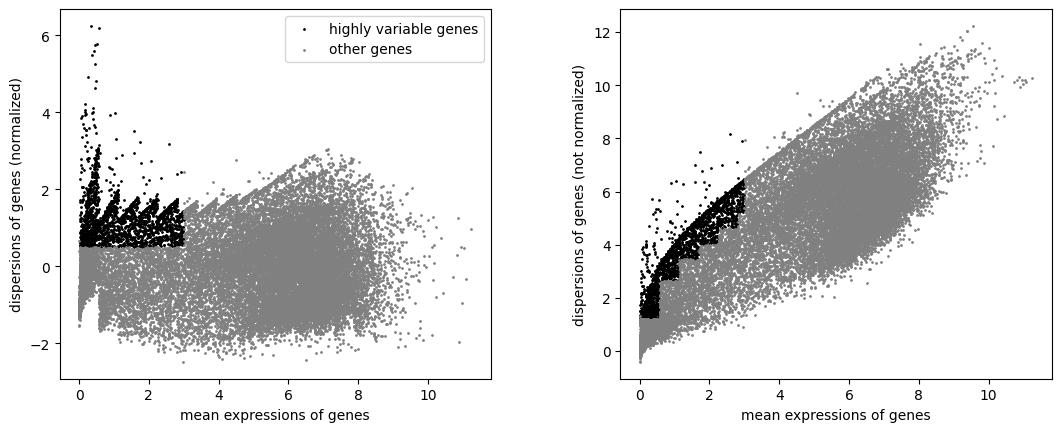

In [13]:
pre_norm_adata = adata.copy()
sc.pp.filter_genes(adata, min_counts=1)
adata.var_names_make_unique()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
sc.pl.highly_variable_genes(adata)

In [14]:
adata = adata[:, adata.var.highly_variable]

sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.leiden(adata)

/home/coakes/miniconda3/envs/rata/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca
/tmp/ipykernel_2033688/810282165.py:5: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


## Plot PCA

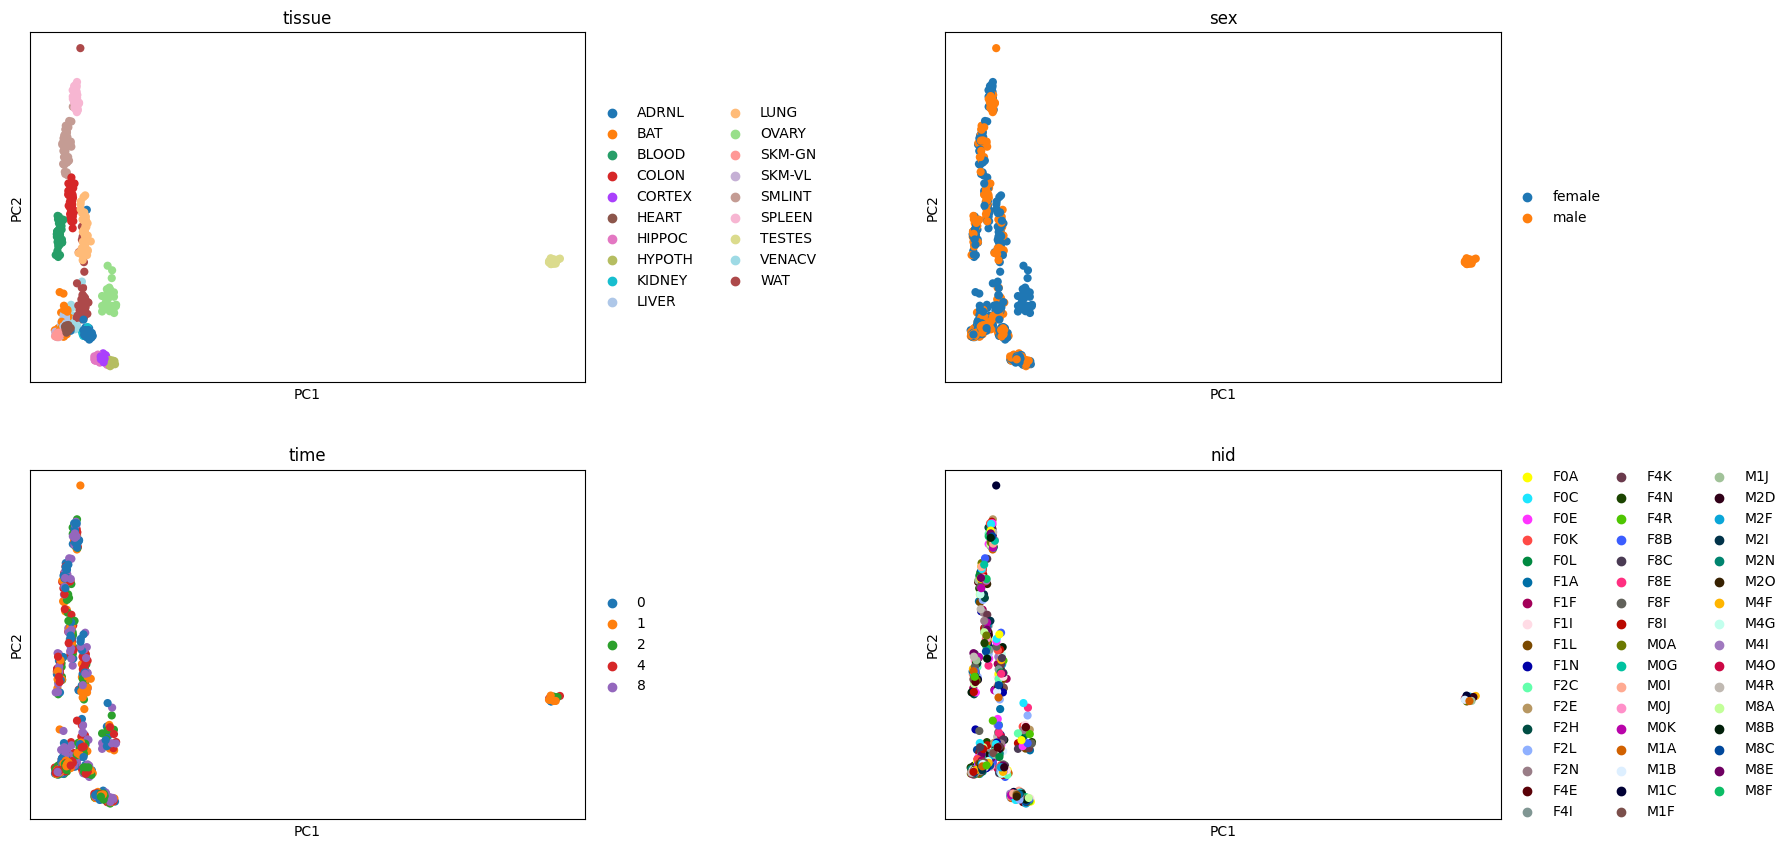

In [ ]:
sc.pl.pca(adata, color=['tissue', 'sex', 'time', 'nid'], ncols=2,wspace=0.5
         )

## Investigate Leiden Mismatches

In [ ]:
tissue_comp = pd.DataFrame({
    'tissue': adata.obs['tissue'].astype('str'),
    'leiden': adata.obs['leiden'].astype('str'),
    'barcode': adata.obs['barcode'].astype('str')
})
all_df = tissue_comp[['tissue', 'leiden']].groupby('tissue', observed=True).value_counts(dropna=True).reset_index()
all_df.columns = ['tissue', 'leiden', 'value']
# Give leiden clusters name of most prevalant tissue
leiden_comp = tissue_comp[['tissue', 'leiden']].groupby('leiden', observed=False).value_counts(dropna=True).reset_index()
most_sig_msk = leiden_comp.groupby('leiden')['count'].transform('max') == leiden_comp['count']
leiden2tissue = leiden_comp[most_sig_msk][['leiden', 'tissue']].set_index('leiden').to_dict()['tissue']
all_df['leiden_tissue'] = [leiden2tissue[x] for x in all_df.leiden]
all_df.to_csv('metadata_csvs/alluvial_inputs.csv')
all_df

,tissue,leiden,value,leiden_tissue
0,ADRNL,11,48,ADRNL
1,ADRNL,2,1,BAT
2,BAT,2,49,BAT
3,BLOOD,3,50,BLOOD
4,COLON,5,49,COLON
5,CORTEX,9,49,CORTEX
6,HEART,7,49,HEART
7,HIPPOC,6,48,HIPPOC
8,HIPPOC,10,1,HYPOTH
9,HYPOTH,10,47,HYPOTH


In [21]:
tissue_comp['leiden_tissue'] = [leiden2tissue[x] for x in tissue_comp.leiden]
tissue_comp['mismatch'] = tissue_comp['tissue'] == tissue_comp['leiden_tissue'] 
mismatches = tissue_comp[(~tissue_comp['mismatch']) & (~tissue_comp.tissue.isin(['SKM-GN', 'SKM-VL']))]
# which mismatches were UMI outliers?
outlier_knee[[x in mismatches.barcode.values for x in outlier_knee.barcode]]

,num_umi,tissue,time,nid,barcode,viallabel,barcode_rank,outlier,original_out
index,,,,,,,,,
717,14279992.0,ADRNL,1,F1N,SRR25251685,90571016002,282,False,True
540,16896936.0,HIPPOC,4,F4E,SRR25251484,90406015202,447,False,False
616,17610256.0,HYPOTH,4,F4E,SRR25251568,90406015402,497,False,True
338,21789131.0,WAT,1,M1C,SRR25251278,90423017005,806,False,True
